In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
import time
from scipy.stats import skew

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
d3=pd.read_csv("D:\\Projects Innomatics\\Concat_HydDel.csv")
d3.head()

,Unnamed: 0,City,Category,Hotel_Name,Locality,Original Price,Discount,Offer Price,Star Rating,Rating,Remarks,Wi-Fi,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,1190.0,65.0,406.0,4.5,870,Excellent,no,no,no,no,no,no,no,no
1,1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,3017.0,67.0,978.0,4.4,988,Very,yes,yes,yes,yes,yes,yes,yes,yes
2,2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,2226.0,54.0,1014.0,4.7,937,Excellent,yes,yes,yes,yes,yes,yes,yes,yes
3,3,Hyderabad,SPOT ON,ON 75815 Hotel Kanha Residency,India,1233.0,72.0,338.0,3.8,394,Good,no,no,no,no,no,no,no,no
4,4,Hyderabad,OYO,74978 Hotel Aadaab,Near Nampally railway station,2317.0,72.0,646.0,3.3,240,Fair,yes,yes,yes,yes,yes,yes,yes,yes


In [3]:
d3.shape

(326, 19)

In [4]:
d3.drop(d3.columns[d3.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
d3.head()

,City,Category,Hotel_Name,Locality,Original Price,Discount,Offer Price,Star Rating,Rating,Remarks,Wi-Fi,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,1190.0,65.0,406.0,4.5,870,Excellent,no,no,no,no,no,no,no,no
1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,3017.0,67.0,978.0,4.4,988,Very,yes,yes,yes,yes,yes,yes,yes,yes
2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,2226.0,54.0,1014.0,4.7,937,Excellent,yes,yes,yes,yes,yes,yes,yes,yes
3,Hyderabad,SPOT ON,ON 75815 Hotel Kanha Residency,India,1233.0,72.0,338.0,3.8,394,Good,no,no,no,no,no,no,no,no
4,Hyderabad,OYO,74978 Hotel Aadaab,Near Nampally railway station,2317.0,72.0,646.0,3.3,240,Fair,yes,yes,yes,yes,yes,yes,yes,yes


In [6]:
d3.shape

(326, 18)

In [7]:
d3.describe()

,Original Price,Discount,Offer Price,Star Rating,Rating
count,326.000000,326.000000,326.000000,326.000000,326.000000
mean,2051.950704,61.226481,838.000000,3.846497,420.892638
std,529.206196,9.497575,337.963293,0.597485,811.978930
min,1000.000000,47.000000,266.000000,1.600000,0.000000
25%,1797.000000,54.000000,625.000000,3.400000,4.000000
50%,2051.950704,61.226481,775.000000,3.900000,8.000000
75%,2260.250000,69.000000,947.500000,4.300000,433.750000
max,4441.000000,83.000000,2332.000000,4.900000,5131.000000


#### Univariate Analysis

In [8]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              326 non-null    object 
 1   Category          326 non-null    object 
 2   Hotel_Name        326 non-null    object 
 3   Locality          326 non-null    object 
 4   Original Price    326 non-null    float64
 5   Discount          326 non-null    float64
 6   Offer Price       326 non-null    float64
 7   Star Rating       326 non-null    float64
 8   Rating            326 non-null    int64  
 9   Remarks           326 non-null    object 
 10  Wi-Fi             326 non-null    object 
 11  CCTV Cameras      326 non-null    object 
 12  Doctor on Call    326 non-null    object 
 13  Parking Facility  326 non-null    object 
 14  Power backup      326 non-null    object 
 15  Elevator          326 non-null    object 
 16  Reception         326 non-null    object 
 1

In [9]:
d3['Category'].describe()

count     326
unique      5
top       OYO
freq      230
Name: Category, dtype: object

In [10]:
d3["Category"].value_counts()

OYO             230
Collection O     29
SPOT ON          28
Capital O        28
Townhouse        11
Name: Category, dtype: int64

In [11]:
cat_oyo=pd.DataFrame(d3["Category"].value_counts())
cat_oyo

,Category
OYO,230
Collection O,29
SPOT ON,28
Capital O,28
Townhouse,11


<AxesSubplot:xlabel='Category', ylabel='count'>

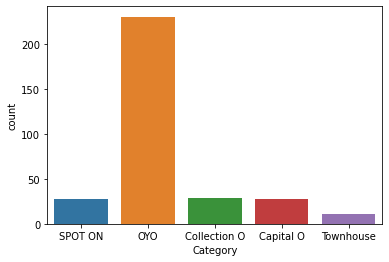

In [12]:
sns.countplot(x='Category', data=d3)

<AxesSubplot:>

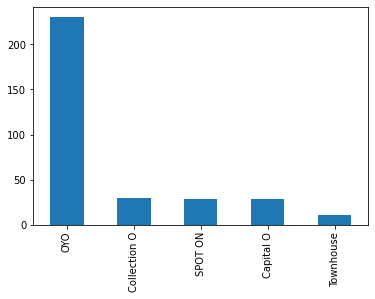

In [13]:
d3["Category"].value_counts().plot.bar()

In [14]:
d3['Original Price'].describe()

count     326.000000
mean     2051.950704
std       529.206196
min      1000.000000
25%      1797.000000
50%      2051.950704
75%      2260.250000
max      4441.000000
Name: Original Price, dtype: float64

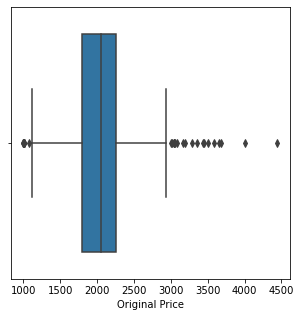

In [15]:
plt.figure(figsize = (5,5))
sns.boxplot(d3["Original Price"]);

<AxesSubplot:>

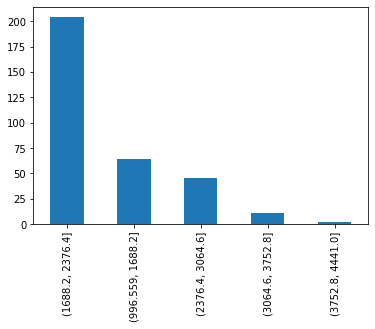

In [16]:
pd.cut(d3['Original Price'],5).value_counts().plot(kind = 'bar')

In [17]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              326 non-null    object 
 1   Category          326 non-null    object 
 2   Hotel_Name        326 non-null    object 
 3   Locality          326 non-null    object 
 4   Original Price    326 non-null    float64
 5   Discount          326 non-null    float64
 6   Offer Price       326 non-null    float64
 7   Star Rating       326 non-null    float64
 8   Rating            326 non-null    int64  
 9   Remarks           326 non-null    object 
 10  Wi-Fi             326 non-null    object 
 11  CCTV Cameras      326 non-null    object 
 12  Doctor on Call    326 non-null    object 
 13  Parking Facility  326 non-null    object 
 14  Power backup      326 non-null    object 
 15  Elevator          326 non-null    object 
 16  Reception         326 non-null    object 
 1

In [18]:
d3["Offer Price"].describe()

count     326.000000
mean      838.000000
std       337.963293
min       266.000000
25%       625.000000
50%       775.000000
75%       947.500000
max      2332.000000
Name: Offer Price, dtype: float64

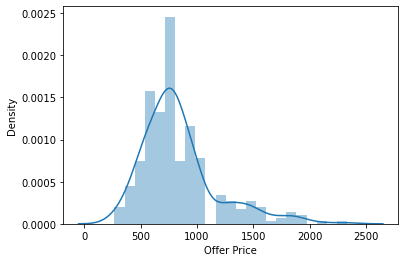

In [19]:
sns.distplot(d3['Offer Price']);

In [20]:
skew(d3['Offer Price'])

1.4243567843113665

In [21]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              326 non-null    object 
 1   Category          326 non-null    object 
 2   Hotel_Name        326 non-null    object 
 3   Locality          326 non-null    object 
 4   Original Price    326 non-null    float64
 5   Discount          326 non-null    float64
 6   Offer Price       326 non-null    float64
 7   Star Rating       326 non-null    float64
 8   Rating            326 non-null    int64  
 9   Remarks           326 non-null    object 
 10  Wi-Fi             326 non-null    object 
 11  CCTV Cameras      326 non-null    object 
 12  Doctor on Call    326 non-null    object 
 13  Parking Facility  326 non-null    object 
 14  Power backup      326 non-null    object 
 15  Elevator          326 non-null    object 
 16  Reception         326 non-null    object 
 1

In [22]:
d3['Rating'].describe()

count     326.000000
mean      420.892638
std       811.978930
min         0.000000
25%         4.000000
50%         8.000000
75%       433.750000
max      5131.000000
Name: Rating, dtype: float64

In [23]:
pd.cut(d3['Rating'],[0,500,5131]).value_counts()

(0, 500]       239
(500, 5131]     75
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='Density'>

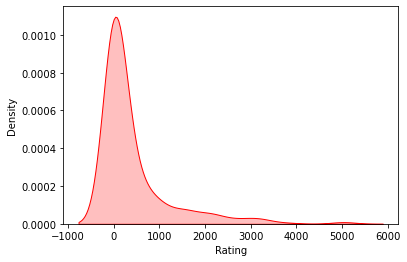

In [24]:
sns.kdeplot(d3['Rating'], color='red', shade='True')
plt.show()

In [25]:
d3['Discount'].describe()

count    326.000000
mean      61.226481
std        9.497575
min       47.000000
25%       54.000000
50%       61.226481
75%       69.000000
max       83.000000
Name: Discount, dtype: float64

<AxesSubplot:xlabel='Discount'>

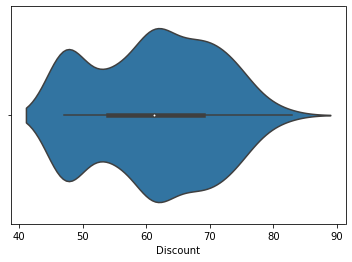

In [26]:
sns.violinplot(d3["Discount"])

#### Bivariate Analysis

In [27]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              326 non-null    object 
 1   Category          326 non-null    object 
 2   Hotel_Name        326 non-null    object 
 3   Locality          326 non-null    object 
 4   Original Price    326 non-null    float64
 5   Discount          326 non-null    float64
 6   Offer Price       326 non-null    float64
 7   Star Rating       326 non-null    float64
 8   Rating            326 non-null    int64  
 9   Remarks           326 non-null    object 
 10  Wi-Fi             326 non-null    object 
 11  CCTV Cameras      326 non-null    object 
 12  Doctor on Call    326 non-null    object 
 13  Parking Facility  326 non-null    object 
 14  Power backup      326 non-null    object 
 15  Elevator          326 non-null    object 
 16  Reception         326 non-null    object 
 1

<AxesSubplot:xlabel='Category', ylabel='Original Price'>

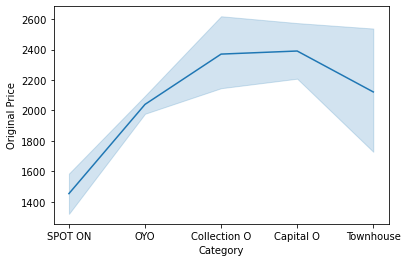

In [28]:
sns.lineplot(x = "Category", y = "Original Price", data = d3)

In [29]:
d3['Offer Price'].describe()

count     326.000000
mean      838.000000
std       337.963293
min       266.000000
25%       625.000000
50%       775.000000
75%       947.500000
max      2332.000000
Name: Offer Price, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Offer Price'>

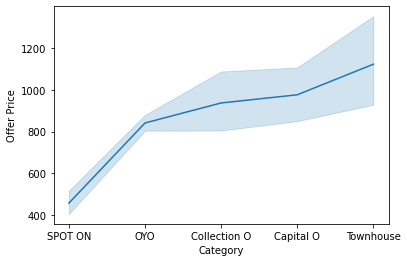

In [30]:
sns.lineplot(x = "Category", y = "Offer Price", data = d3)

In [31]:
d3.columns

Index(['City', 'Category', 'Hotel_Name', 'Locality', 'Original Price',
       'Discount', 'Offer Price', 'Star Rating', 'Rating', 'Remarks', 'Wi-Fi',
       'CCTV Cameras', 'Doctor on Call', 'Parking Facility', 'Power backup',
       'Elevator', 'Reception', 'AC'],
      dtype='object')

<AxesSubplot:xlabel='Category', ylabel='Rating'>

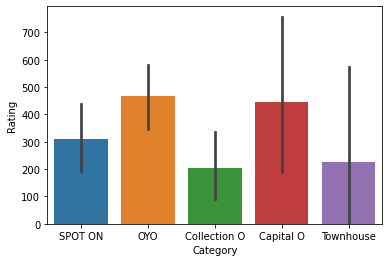

In [32]:
sns.barplot(x='Category', y='Rating', data=d3)

In [33]:
d3['Rating'].describe()

count     326.000000
mean      420.892638
std       811.978930
min         0.000000
25%         4.000000
50%         8.000000
75%       433.750000
max      5131.000000
Name: Rating, dtype: float64

In [34]:
d3.columns

Index(['City', 'Category', 'Hotel_Name', 'Locality', 'Original Price',
       'Discount', 'Offer Price', 'Star Rating', 'Rating', 'Remarks', 'Wi-Fi',
       'CCTV Cameras', 'Doctor on Call', 'Parking Facility', 'Power backup',
       'Elevator', 'Reception', 'AC'],
      dtype='object')

In [35]:
d3['Category'].value_counts()

OYO             230
Collection O     29
SPOT ON          28
Capital O        28
Townhouse        11
Name: Category, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Offer Price'>

(array([0, 1]), [Text(0, 0, 'Hyderabad'), Text(1, 0, 'Delhi')])

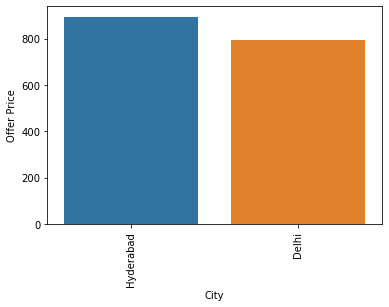

In [36]:
sns.barplot(x='City', y='Offer Price', data=d3,ci=None)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Star Rating', ylabel='Category'>

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

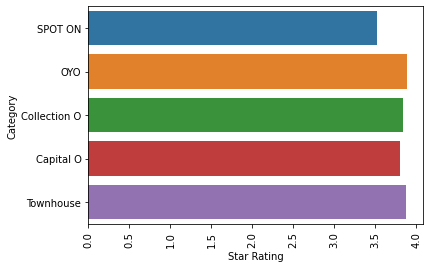

In [37]:
sns.barplot(x='Star Rating', y='Category', data=d3,ci=None)
plt.xticks(rotation = 90)
plt.show()

In [38]:
d3.groupby("City")["Original Price"].mean()

City
Delhi        1994.727778
Hyderabad    2122.499518
Name: Original Price, dtype: float64

<AxesSubplot:xlabel='City', ylabel='Original Price'>

(array([0, 1]), [Text(0, 0, 'Hyderabad'), Text(1, 0, 'Delhi')])

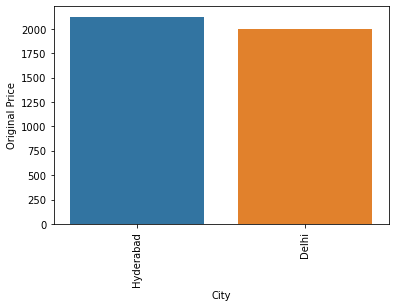

In [39]:
sns.barplot(x='City', y='Original Price', data=d3,ci=None)
plt.xticks(rotation = 90)
plt.show()

In [40]:
d3.head()

,City,Category,Hotel_Name,Locality,Original Price,Discount,Offer Price,Star Rating,Rating,Remarks,Wi-Fi,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,1190.0,65.0,406.0,4.5,870,Excellent,no,no,no,no,no,no,no,no
1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,3017.0,67.0,978.0,4.4,988,Very,yes,yes,yes,yes,yes,yes,yes,yes
2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,2226.0,54.0,1014.0,4.7,937,Excellent,yes,yes,yes,yes,yes,yes,yes,yes
3,Hyderabad,SPOT ON,ON 75815 Hotel Kanha Residency,India,1233.0,72.0,338.0,3.8,394,Good,no,no,no,no,no,no,no,no
4,Hyderabad,OYO,74978 Hotel Aadaab,Near Nampally railway station,2317.0,72.0,646.0,3.3,240,Fair,yes,yes,yes,yes,yes,yes,yes,yes


#### Categorical vs Categorical

In [41]:
cross_tab=pd.crosstab(d3['Category'], d3['Wi-Fi'])
cross_tab

Wi-Fi,no,yes
Category,,
Capital O,8,20
Collection O,8,21
OYO,77,153
SPOT ON,21,7
Townhouse,5,6


<AxesSubplot:xlabel='Category'>

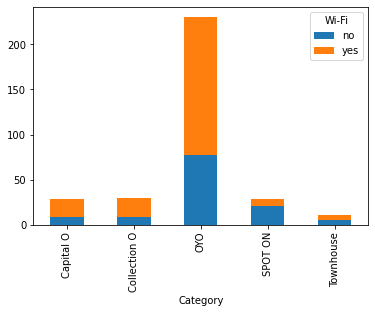

In [42]:
cross_tab.plot(kind="bar", 
                 stacked=True)

In [43]:
d3.head(1)

,City,Category,Hotel_Name,Locality,Original Price,Discount,Offer Price,Star Rating,Rating,Remarks,Wi-Fi,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,1190.0,65.0,406.0,4.5,870,Excellent,no,no,no,no,no,no,no,no


In [44]:
d3.pivot_table(values="Original Price", index="Category",columns = 'City',aggfunc ='sum')

City,Delhi,Hyderabad
Category,,
Capital O,31874.0,35074.901408
Collection O,38877.0,29874.950704
OYO,259117.0,210087.274648
SPOT ON,14310.0,26379.852113
Townhouse,14873.0,8467.950704


<AxesSubplot:xlabel='Category', ylabel='Original Price'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SPOT ON'),
  Text(1, 0, 'OYO'),
  Text(2, 0, 'Collection O'),
  Text(3, 0, 'Capital O'),
  Text(4, 0, 'Townhouse')])

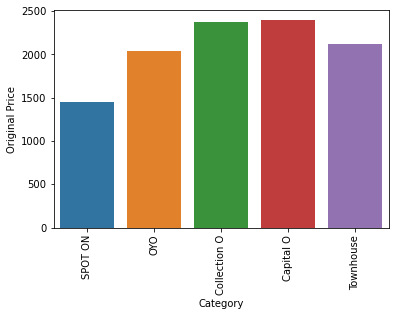

In [45]:
sns.barplot(x='Category', y='Original Price', data=d3,ci=None)
plt.xticks(rotation = 90)
plt.show()

#### Multivariate Analysis

In [46]:
d3.groupby(['Category','City'])['Offer Price'].agg({'min','mean','median','max'})

median         mean     max    min
Category     City                                         
Capital O    Delhi       801.5   905.642857  1902.0  549.0
             Hyderabad   942.5  1046.642857  1726.0  549.0
Collection O Delhi       740.0   813.705882  1684.0  559.0
             Hyderabad   902.0  1111.750000  2332.0  664.0
OYO          Delhi       699.0   782.787879  1807.0  489.0
             Hyderabad   775.0   920.244898  2107.0  330.0
SPOT ON      Delhi       454.0   511.666667   799.0  364.0
             Hyderabad   406.0   432.631579   778.0  266.0
Townhouse    Delhi       930.0  1025.125000  1612.0  715.0
             Hyderabad  1452.0  1381.333333  1917.0  775.0

<AxesSubplot:xlabel='Category', ylabel='Offer Price'>

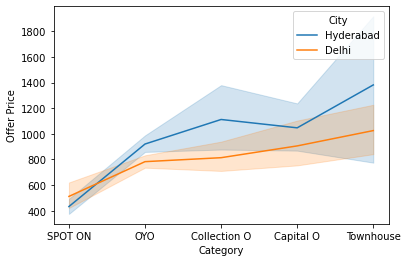

In [47]:
sns.lineplot(x = "Category", y = "Offer Price", hue='City', data = d3)
plt.show()

<AxesSubplot:xlabel='Original Price'>

(array([ 500., 1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500.,
        5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

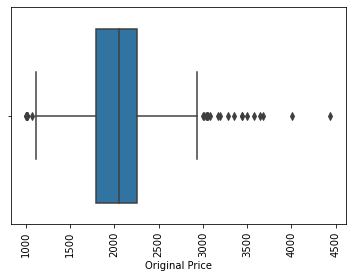

In [48]:
sns.boxplot(x = d3["Original Price"],
            hue = d3["City"])
plt.xticks(rotation=90)
plt.show()

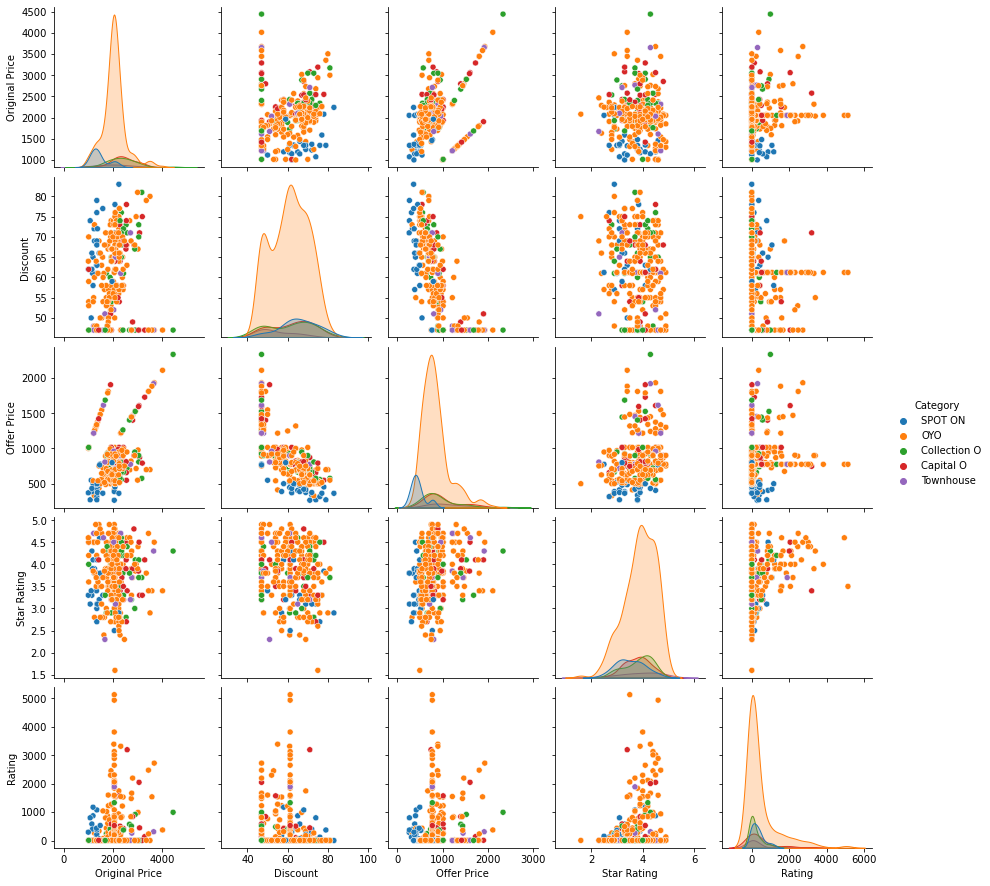

In [49]:
sns.pairplot(d3, hue="Category")

#### Heat Map

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

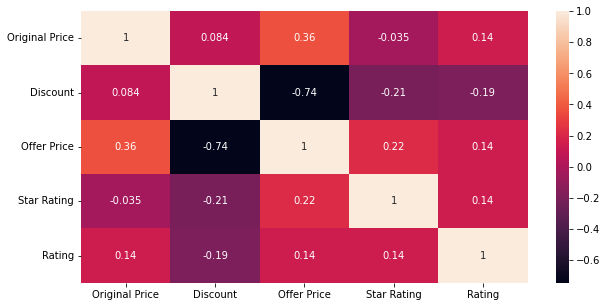

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(d3.corr(),annot=True)
plt.show()

In [51]:
d3.columns

Index(['City', 'Category', 'Hotel_Name', 'Locality', 'Original Price',
       'Discount', 'Offer Price', 'Star Rating', 'Rating', 'Remarks', 'Wi-Fi',
       'CCTV Cameras', 'Doctor on Call', 'Parking Facility', 'Power backup',
       'Elevator', 'Reception', 'AC'],
      dtype='object')

<AxesSubplot:xlabel='City', ylabel='Category'>

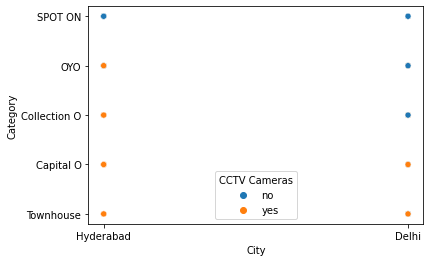

In [52]:
sns.scatterplot(d3["City"],d3["Category"],hue=d3["CCTV Cameras"])

In [53]:
cross_tab=pd.crosstab(d3['City'], d3['CCTV Cameras'])
cross_tab

CCTV Cameras,no,yes
City,,
Delhi,67,113
Hyderabad,52,94


<AxesSubplot:xlabel='Original Price', ylabel='Offer Price'>

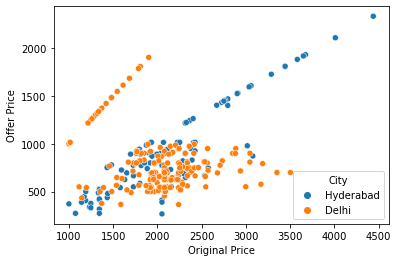

In [54]:
sns.scatterplot(d3["Original Price"],d3["Offer Price"],hue=d3["City"])

<AxesSubplot:xlabel='Offer Price', ylabel='Discount'>

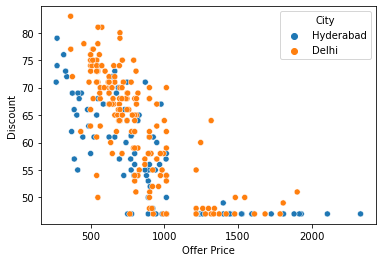

In [55]:
sns.scatterplot(d3["Offer Price"],d3["Discount"],hue=d3["City"])

In [56]:
CCTV_Camera = pd.DataFrame(d3['CCTV Cameras'].value_counts())
CCTV_Camera


,CCTV Cameras
yes,207
no,119


<Figure size 576x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x14937aa58e0>,
 [Text(-0.4525692692071281, 1.0025871815305272, 'yes'),
  Text(0.4525693630761124, -1.00258713915793, 'no')],
 [Text(-0.24685596502206983, 0.5468657353802875, '63%'),
  Text(0.246856016223334, -0.5468657122679617, '37%')])

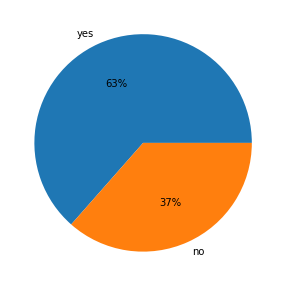

In [57]:
plt.figure(figsize=(8,5))
plt.pie(CCTV_Camera['CCTV Cameras'], labels=CCTV_Camera.index, autopct='%.0f%%')
plt.show()

In [58]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              326 non-null    object 
 1   Category          326 non-null    object 
 2   Hotel_Name        326 non-null    object 
 3   Locality          326 non-null    object 
 4   Original Price    326 non-null    float64
 5   Discount          326 non-null    float64
 6   Offer Price       326 non-null    float64
 7   Star Rating       326 non-null    float64
 8   Rating            326 non-null    int64  
 9   Remarks           326 non-null    object 
 10  Wi-Fi             326 non-null    object 
 11  CCTV Cameras      326 non-null    object 
 12  Doctor on Call    326 non-null    object 
 13  Parking Facility  326 non-null    object 
 14  Power backup      326 non-null    object 
 15  Elevator          326 non-null    object 
 16  Reception         326 non-null    object 
 1

In [59]:
City_OYO = pd.DataFrame(d3['City'].value_counts())
City_OYO

,City
Delhi,180
Hyderabad,146


<Figure size 720x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x14937af5730>,
 [Text(-0.1794028094489584, 1.085271685782791, 'Delhi'),
  Text(0.1794027078384893, -1.0852717025796894, 'Hyderabad')],
 [Text(-0.09785607788125002, 0.5919663740633405, '55%'),
  Text(0.09785602245735779, -0.591966383225285, '45%')])

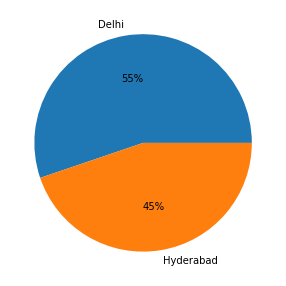

In [60]:
plt.figure(figsize=(10,5))
plt.pie(City_OYO['City'], labels=City_OYO.index, autopct='%.0f%%')
plt.show()

In [61]:
Remark1 = pd.DataFrame(d3['Remarks'].value_counts())
Remark1

,Remarks
Fair,97
Very,85
Good,82
Excellent,58
Fabulous,4


<Figure size 720x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x14937b48250>,
 [Text(0.6534052971046104, 0.8849076323072572, 'Fair'),
  Text(-0.9890861114647708, 0.4813612615359688, 'Very'),
  Text(-0.4428866572256767, -1.0069018864077404, 'Good'),
  Text(0.8849076323072573, -0.6534052971046103, 'Excellent'),
  Text(1.099182864249613, -0.042391401722720816, 'Fabulous')],
 [Text(0.3564028893297875, 0.48267689034941297, '30%'),
  Text(-0.5395015153444204, 0.2625606881105284, '26%'),
  Text(-0.24157454030491454, -0.5492192107678583, '25%'),
  Text(0.482676890349413, -0.3564028893297874, '18%'),
  Text(0.5995542895906979, -0.023122582757847718, '1%')])

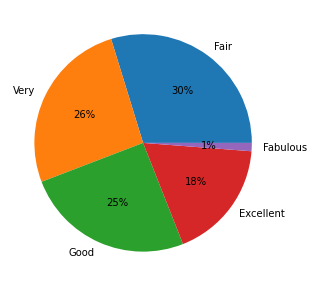

In [62]:
plt.figure(figsize=(10,5))
plt.pie(Remark1['Remarks'], labels=Remark1.index, autopct='%.0f%%')
plt.show()

In [63]:
d3.columns

Index(['City', 'Category', 'Hotel_Name', 'Locality', 'Original Price',
       'Discount', 'Offer Price', 'Star Rating', 'Rating', 'Remarks', 'Wi-Fi',
       'CCTV Cameras', 'Doctor on Call', 'Parking Facility', 'Power backup',
       'Elevator', 'Reception', 'AC'],
      dtype='object')

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='Discount', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '47.0'),
  Text(1, 0, '48.0'),
  Text(2, 0, '49.0'),
  Text(3, 0, '50.0'),
  Text(4, 0, '51.0'),
  Text(5, 0, '52.0'),
  Text(6, 0, '53.0'),
  Text(7, 0, '54.0'),
  Text(8, 0, '55.0'),
  Text(9, 0, '56.0'),
  Text(10, 0, '57.0'),
  Text(11, 0, '58.0'),
  Text(12, 0, '59.0'),
  Text(13, 0, '60.0'),
  Text(14, 0, '61.0'),
  Text(15, 0, '61.22648083623693'),
  Text(16, 0, '62.0'),
  Text(17, 0, '63.0'),
  Text(18, 0, '64.0'),
  Text(19, 0, '65.0'),
  Text(20, 0, '66.0'),
  Text(21, 0, '67.0'),
  Text(22, 0, '68.0'),
  Text(23, 0, '69.0'),
  Text(24, 0, '70.0'),
  Text(25, 0, '71.0'),
  Text(26, 0, '72.0'),
  Text(27, 0, '73.0'),
  Text(28, 0, '74.0'),
  Text(29, 0, '75.0'),
  Text(30, 0, '76.0'),
  Text(31, 0, '77.0'),
  Text(32, 0, '78.0'),
  Text(33, 0, '79.0'),
  Text(34, 0, '80.0'),
  Text(35, 0, '81.

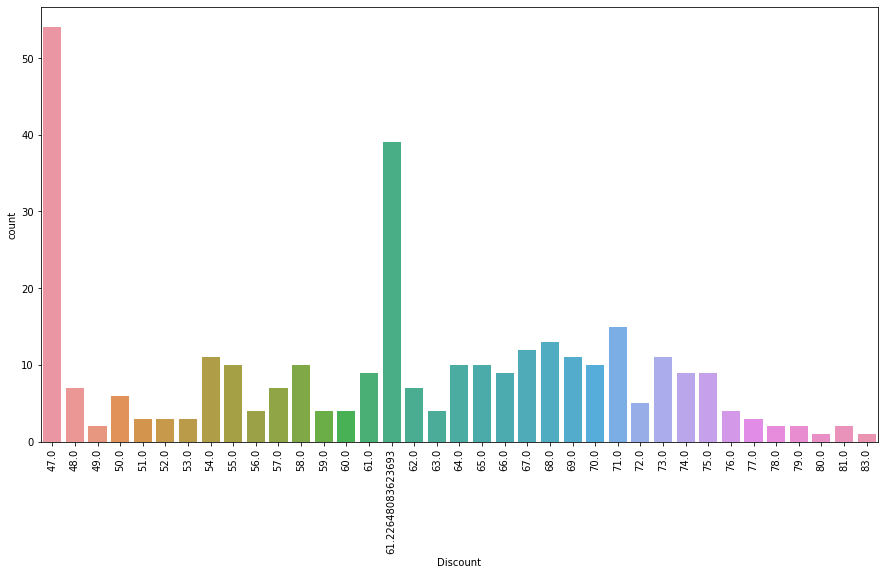

In [80]:
plt.figure(figsize=(15,8))
sns.countplot(x='Discount', data=d3)
plt.xticks(rotation=90)
plt.show()

In [ ]:
locality_values = d3['City'].value_counts()
locality = d3['City'].value_counts().index
locality_values

In [ ]:
plt.title("HIGHEST OYO ROOM \n IN WHICH CITY", y = 1.5, bbox={'facecolor':'w', 'pad':5 })
plt.pie(locality_values[:5], labels = locality[:5], autopct = "%1.0f%%", explode = [0.1,0,0,0,0], radius = 2, startangle = 90)

In [76]:
d3.groupby(['Category','City'])['Rating'].agg({'min','mean','median','max'})

median         mean   max  min
Category     City                                     
Capital O    Delhi         4.0     4.642857     9    0
             Hyderabad   516.0   887.071429  3194    8
Collection O Delhi         2.0     3.882353     9    0
             Hyderabad   439.5   492.000000  1331   19
OYO          Delhi         5.0     5.030303     9    0
             Hyderabad   746.0  1091.153061  5131    8
SPOT ON      Delhi         4.0     4.000000     8    0
             Hyderabad   370.0   453.736842  1172   56
Townhouse    Delhi         6.5     5.875000     9    1
             Hyderabad   308.0   818.666667  1889  259

<AxesSubplot:xlabel='Category', ylabel='Rating'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SPOT ON'),
  Text(1, 0, 'OYO'),
  Text(2, 0, 'Collection O'),
  Text(3, 0, 'Capital O'),
  Text(4, 0, 'Townhouse')])

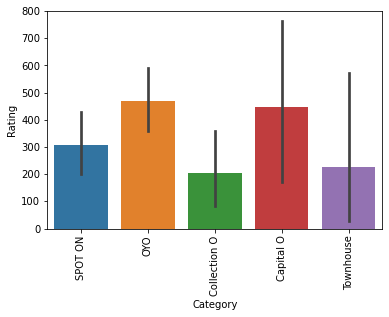

In [77]:
sns.barplot(x='Category', y='Rating', data=d3)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='City', ylabel='Rating'>

(array([0, 1]), [Text(0, 0, 'Hyderabad'), Text(1, 0, 'Delhi')])

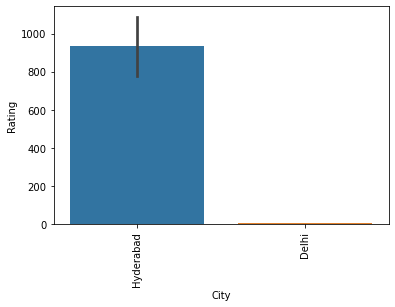

In [78]:
sns.barplot(x='City', y='Rating', data=d3)
plt.xticks(rotation = 90)
plt.show()

<Figure size 1080x576 with 0 Axes>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1080x576 with 0 Axes>

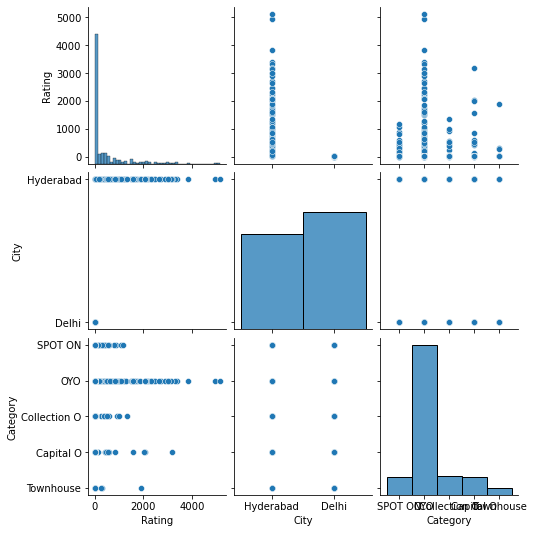

In [75]:
plt.figure(figsize=(15,8))
sns.pairplot(data = d3, vars=['Rating','City','Category'])
plt.xticks(rotation=45)
plt.show()